In [6]:
import os
import sys

#home=os.path.expanduser("~") # HOME이 설정되어 있지 않으면 expanduser('~')를 사용한다.
#osn.environ["PYSPARK_PYTHON"] = "/usr/bin/python"
os.environ["SPARK_HOME"]=os.path.join(os.path.expanduser("~"),r"C:\Users\user\spark-2.0.0-bin-hadoop2.7\spark-2.0.0-bin-hadoop2.7")
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [7]:
import pyspark
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config("spark.sql.warehouse.dir", r"C:\Users\user\MyStudySpace\2019-2\BigData_Spark\src")\
    .getOrCreate()

## OLS
회귀모델은 OLS(ordinary least squares)를 최소화하여 도출
- OLS는 y실제 - y^예측 차이의 제곱을 합계낸 값
- OLS (Ordinary Least Square)를 최소화 사용하여 회귀식을 품.

In [1]:
# 데이터 생성
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

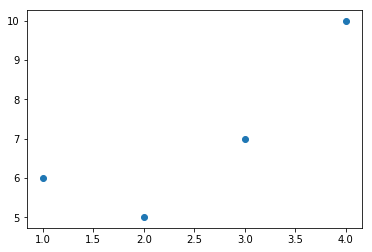

In [4]:
# 그래프
# 111 = 1행 1열의 첫번째
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)

## 선형 회귀식 풀기
6=β0+β1×1

5=β0+β1×2

7=β0+β1×3

10=β0+β1×4

실제와 예측의 차이인 오류 (y−yhat)2를 최소화하는 베타 값을 구해보자.

(6−(β0+β1×1))2

(5−(β0+β1×2))2

(7−(β0+β1×3))2

(10−(β0+β1×4))2

위 식을 모두 더해서 총오류를 구하면:

f=210+4β20+30β21+20β0β1−56β0−154β1
위를 편미분하면:

∂f∂β0=8β0+20β1−56
∂f∂β1=20β0+60β1−154
이를 풀면:

β0=3.5
β1=1.4

In [5]:
yhat=x*1.4+3.5
print(yhat)

[4.9 6.3 7.7 9.1]


In [6]:
yhat-y

array([-1.1,  1.3,  0.7, -0.9])

In [7]:
# f
np.sum(np.power(yhat-y,2))

4.199999999999998

## 파이썬으로 미분

In [9]:
# differentiation
import sympy as sp
# b0 b1로 변수 설정 y=b1x + b0
b0,b1=sp.symbols('b0 b1')

In [10]:
# diff(f,b0)는 f함수를 b0에 대해서 미분하는 명령어
# diff(f,b1)는 f함수를 b1에 대해서 미분
f=210 + 4*b0**2 + 30*b1**2 + 20*b0*b1 - 56*b0 - 154*b1
fdiff_b0=sp.diff(f,b0)
fdiff_b1=sp.diff(f,b1)
print("fdiff with b0: ",fdiff_b0,"fdiff with b1: ",fdiff_b1)

('fdiff with b0: ', 8*b0 + 20*b1 - 56, 'fdiff with b1: ', 20*b0 + 60*b1 - 154)


In [12]:
# solve()로 해 구하기
exp=sp.solve([fdiff_b0, fdiff_b1],[b0,b1])
print("exp={0}".format(exp))

exp={b0: 7/2, b1: 7/5}


## R^2
종속변수 dependent variable의 분산을 독립변수 independent variable(s)로 얼마나 예측할 수 있는지를 나타냄.
- TSS (Total Sum of Squared Errors ) = SSE (Sum of squared errors) + SSR (Residual Sum of squared errors)
    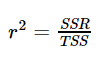

In [13]:
import numpy as np
x=np.arange(0,9)
y=np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24])

In [14]:
# 1을 넣어서 절편을 구헤주기
A=np.array([x,np.ones(9)])
print A

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [15]:
# T = 전치행렬
w0,w1=np.linalg.lstsq(A.T,y)[0]
print w0,w1

0.7166666666666671 19.188888888888894


C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [16]:
# 예측값 구하기
yhat=w0*x+w1
print yhat

[19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


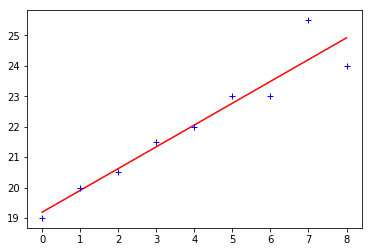

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,yhat,'r-',x,y,'b+')
plt.show()

In [25]:
# R squared
SSR = sum((y-yhat)**2)
TSS = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/TSS
print r_squared

0.9138385502471169


adjusted R-squared는 독립변수의 개수에 따라 과도한 R2를 수정한 값
    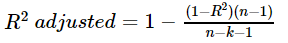
    - n = 데이터 개수
    - k = 독립변수 개수

In [26]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-A.shape[0]-1)   # 0.9015 without -1
print adjusted_r_squared

0.8851180669961559


In [32]:
import statsmodels.api as sm
result = sm.OLS(y,A.T).fit()
print result.summary()
print result.rsquared, result.rsquared_adj
# 0.877643371323 0.863248473832

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     74.24
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           5.66e-05
Time:                        17:27:33   Log-Likelihood:                -7.6827
No. Observations:                   9   AIC:                             19.37
Df Residuals:                       7   BIC:                             19.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7167      0.083      8.616      0.0

C:\Users\user\Anaconda2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


## matrix inverse method
회귀분석을 역행렬을 이용하여 풀기

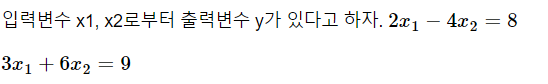

In [34]:
import numpy as np

y=[8,9]
x=[[2,-4],[3,6]]

In [35]:
print "x: ", x, "y: ", y

x:  [[2, -4], [3, 6]] y:  [8, 9]


In [37]:
# set_printoptions(precision=2, suppress=True)는 출력 자릿수를 2자리로 제한 가능
np.set_printoptions(precision=2, suppress=True)
# inv(x) = x의 역행렬
xT = np.linalg.inv(x) 
print "x inv: \n", xT 

x inv: 
[[ 0.25  0.17]
 [-0.12  0.08]]


### identity matrix
x*xT는 1, 즉 identity matrix

In [40]:
# print np.eye(2)로도 대체 가능
print "identity matrix 'x * xT': \n", np.dot(x,xT)

identity matrix 'x * xT': 
[[1. 0.]
 [0. 1.]]


## β
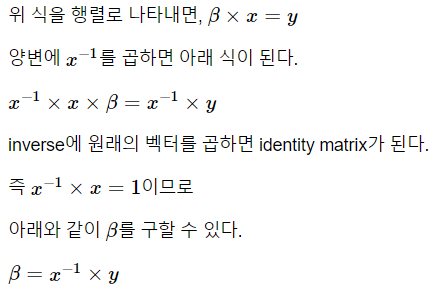

### inverse 계산

In [42]:
# matrix inverse
v=np.array([[2,3],[4,5]])
vI=np.linalg.inv(v)
print "v={0}\nv.I={1}".format(v,vI) #([[-2.5, 1.5], [ 2. , -1. ]])

v=[[2 3]
 [4 5]]
v.I=[[-2.5  1.5]
 [ 2.  -1. ]]


In [43]:
left=1./(2*5-3*4)
right=np.array([5,-3,-4,2])
print left*right #array([-2.5,  1.5,  2. , -1. ])

[-2.5  1.5  2.  -1. ]


### inverse로 β 계산
matrix inverse method를 풀어보자. numpy array로 행렬을 선언하고, 다음 식을 np.dot(), np.linalg.inv() 함수를 이용해서 풀면 x1, x2를 구할 수 있음.

In [44]:
import numpy as np

x=np.array([[2,-4],[3,6]])
y=np.array([8,9])

In [45]:
xI=np.linalg.inv(x)

In [46]:
w1,w2=np.dot(xI,y)
print(w1,w2)

(3.5, -0.25)


In [47]:
print 2*w1+(-4)*w2
print 3*w1+6*w2

8.0
9.0


In [48]:
print np.linalg.solve(x,y)

[ 3.5  -0.25]


## 문제: Matrix Inverse Method 회귀모델
x: 1,2,3,4 y: 6,5,7,10의 경우 회귀식을 도출해 보자. 답은 y=3.0 + 1.7x

In [10]:
# 데이터 생성
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

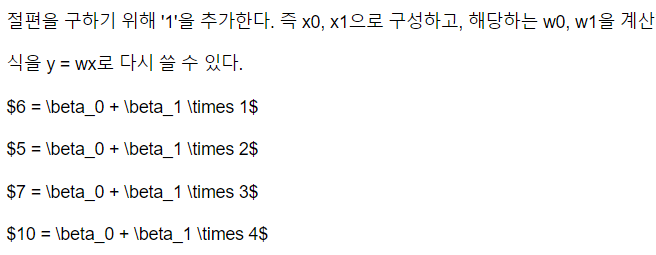

주의할 점은 x를 [x 1]로 변환
    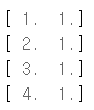

원래의 데이터가 x는 행 2, 열 4로 구성되어서, transpose해야 4,2로 변환된다.

In [11]:
x=np.array([x,np.ones(len(x))])
x=x.T
print(x)

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]


In [8]:
# matrix inverse 구하기
np.dot(x,x.T)

array([[ 2.,  3.,  4.,  5.],
       [ 3.,  5.,  7.,  9.],
       [ 4.,  7., 10., 13.],
       [ 5.,  9., 13., 17.]])

In [9]:
np.linalg.inv(np.dot(x,x.T)) # 이 방법은 X

LinAlgError: Singular matrix

x (4,2), x.T (2,4)의 dot()을 구하면 (4,4) 순서를 바꾸면 x.T (2,4) x (4,2) -> (2,2)

In [12]:
# 한 줄로 줄여서 연산
np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

array([1.4, 3.5])

## numpy 최소자승법
numpy.linalg.lstsq()에는 컬럼벡터 x를 적어줌.
    - 그 결과는 앞서 계산값과 일치
반환 값은 가중치 weights

In [13]:
np.warnings.filterwarnings('ignore')   #suppress numpy warnings
print("numpy lstsq: ",np.linalg.lstsq(x,y))

('numpy lstsq: ', (array([1.4, 3.5]), array([4.2]), 2, array([5.77937881, 0.77380911])))


In [14]:
# w0,w1는 위에서 풀었던 해와 동일하게 계산
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
w1,w0=np.linalg.lstsq(x,y)[0]
print("w1=",w1,"\nw0=",w0)

('w1=', 1.4000000000000001, '\nw0=', 3.4999999999999982)


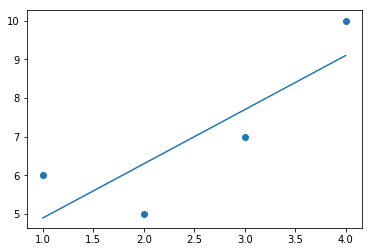

In [15]:
# 최소자승법으로 구한 회귀선을 그래프로 그리기
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# compute yhat from the model values of b0 and b1
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
_x=np.array([x,np.ones(len(x))])
_x=_x.T
b1,b0=np.linalg.lstsq(_x,y)[0]
yhat=b0+b1*x
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,yhat)

## 문제: Matrix Inverse Method 회귀모델
데이터

x1 [1,2],[1,4],[1,6] y1 3,6,7

w0, w1으로 A를 구성해보기

In [16]:
import numpy as np
x1 = np.array([[1,2],[1,4],[1,6]])
y1 = np.array([3,6,7])

In [18]:
print(x1.shape,y1.shape)
print x1

((3L, 2L), (3L,))
[[1 2]
 [1 4]
 [1 6]]


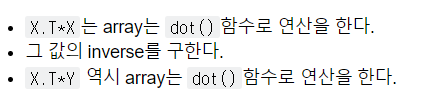

In [19]:
xTx=np.dot(x1.T,x1)
print("xTx=",xTx)

('xTx=', array([[ 3, 12],
       [12, 56]]))


In [20]:
xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

('xTxI=', array([[ 2.33, -0.50],
       [-0.50,  0.12]]))


In [21]:
xTyT=np.dot(x1.T,y1)
print("xTyT=",xTyT)

('xTyT=', array([16, 72]))


In [22]:
np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y1))

array([ 1.33,  1.00])

In [23]:
w0, w1 = np.linalg.lstsq(x1, y1)[0]
print(w0,w1)

(1.333333333333331, 1.0000000000000002)


## 오류 계산

In [24]:
# 연산을 요소별로 계산, 넘파이는 소수점을 정밀도 그대로 출력
print "i  error       ","y       ","pred    "
print "-- ------------","--------","--------"
for i in range(len(x1)):
  predicted=w0*x1[i][0] + w1*x1[i][1]
  error=y1[i]-predicted
  print("{:2d} {}={}-{:.2f}".format(i,error,y1[i],predicted))

i  error        y        pred    
-- ------------ -------- --------
 0 -0.333333333333=3-3.33
 1 0.666666666667=6-5.33
 2 -0.333333333333=7-7.33


In [25]:
# 벡터로 계산
w=np.array([w0,w1])

In [26]:
# dot 연산을 위한 차원을 맞추어줘야 함
x1.shape,w.shape

w=w[:,np.newaxis]
print w.shape
print w

(2L, 1L)
[[ 1.33]
 [ 1.00]]


In [27]:
# dot() 연산으로 에측치 출력
pred=np.dot(x1,w)
print pred

[[ 3.33]
 [ 5.33]
 [ 7.33]]


### matrix 연산

In [28]:
import numpy as np
X=np.matrix([[1,2],[1,4],[1,6]])
Y=np.matrix([3,6,7])
xTx=X.T*X
xTxI=xTx.I  #inversible as xTx.det() (3*56 - 12*12) != 0
xTyT=X.T*Y.T
print("weights=",xTxI*xTyT) #1.33 1.00 thus y=1.33+1.00x1+e

('weights=', matrix([[ 1.33],
        [ 1.00]]))


## Gradient 알고리즘
오류를 점차 줄여가는 기울기를 선택하가면서 최적해를 찾는다.
greedy 탐욕알고리즘으로, 경사도를 선택하여 답을 찾아가지만, 그 답이 최적이라는 보장은 없다.
local optimum : 로컬에서의 최저점
global optimum ; 전체 회귀에서의 최저점
    - 최저점을 찾는다고 해서 글로벌이라고 보장못함    

gradient =(hθ(x)−y)xj
    - 오류에 x를 dot 연산

### batch, stochastic
- batch gradient, 학습데이터를 모두 일괄적으로 합계내어, 모델을 갱신함 (deterministic)
        - 반복: θ ∀i
- stochastic gradient descent (incremental gradient descent) 데이터를 하나씩 사용하여, 모델을 갱신함. 따라서 결과가 batch와 다를 수 있음.
        - 반복
            for i in range(m):
                θ 갱신 ∀i

## 의사코드
- 모든 계수 θ=1 (또는 무작위)
        - 반복
            - gradient 계산
            - θ 갱신
                θj:=θj−α∂∂θjJ(θ)

## Gredient 방식으로 구하기

실제와 예측의 차이인 오류 (y−yhat)2를 최소화하는 베타 값을 구해보기
    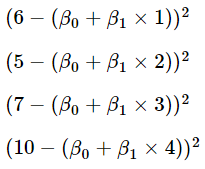

β0 에 대해 편미분
    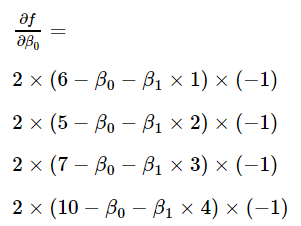

위 식을 모두 더해서 총오류를 구하면
            20$\beta_0$+60$\beta_1$−154

In [30]:
import sympy as sp
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
b0,b1=sp.symbols('b0 b1')
np.sum(-2 * (y-(b0+x.dot(b1))))

8*b0 + 20*b1 - 56

## x, y

In [31]:
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
#x=np.array([0.5,2.3,2.9])
#y=np.array([1.4,1.9,3.2])

In [32]:
x=np.array([x,np.ones(len(x))])  # w0 * x0 + w1 * x1
x=x.T
print x, x.shape

[[ 1.00  1.00]
 [ 2.00  1.00]
 [ 3.00  1.00]
 [ 4.00  1.00]] (4L, 2L)


## theta

In [33]:
theta=np.array(np.ones([x.shape[1]]))
print theta

[ 1.00  1.00]


## h(x)

In [34]:
print x*theta  # 잘못된 연산 (dot() 연산해야 함)
print np.dot(x,theta)

[[ 1.00  1.00]
 [ 2.00  1.00]
 [ 3.00  1.00]
 [ 4.00  1.00]]
[ 2.00  3.00  4.00  5.00]


In [36]:
# 함수로
def h(x,theta):
    return np.dot(x,theta)

h(x,theta)

array([ 2.00,  3.00,  4.00,  5.00])

## gradient
### error

In [37]:
error=h(x,theta)-y
print error

[-4.00 -2.00 -3.00 -5.00]


### gradient

In [38]:
print np.sum(y-h(x,theta))*(-2)/len(x)

-7.0


In [39]:
gradient=np.dot(x.T,error)
print gradient

[-37.00 -14.00]


### update

In [41]:
# 기울기에 학습률을 곱하여 빼주면 theta 갱신
alpha=0.01
theta -= alpha*gradient
print theta

#def gradientDescent(x, y, theta, alpha, m, numIterations):
alpha=0.01
numIterations=4000
theta=np.ones([x.shape[1]])
#theta=np.array([1,1])
for i in range(numIterations):
    h=np.dot(x,theta)
    error=h-y
    #gradient=[np.sum(y-h)*(-2), np.sum((y-h)*x)*(-2)]
    cost = np.sum((h-y)** 2) / (2 * len(x))
    gradient=np.dot(x.T,error) # w0, w1
    theta -= alpha*gradient
    if i%100 == 0:
        print "Iteration {0} | theta {1} Cost {2:.5f}".format(i, theta, cost)
#    return theta

[ 1.74  1.28]
Iteration 0 | theta [ 1.37  1.14] Cost 6.75000
Iteration 100 | theta [ 1.79  2.34] Cost 0.63779
Iteration 200 | theta [ 1.62  2.87] Cost 0.55893
Iteration 300 | theta [ 1.52  3.15] Cost 0.53521
Iteration 400 | theta [ 1.46  3.31] Cost 0.52807
Iteration 500 | theta [ 1.44  3.40] Cost 0.52592
Iteration 600 | theta [ 1.42  3.44] Cost 0.52528
Iteration 700 | theta [ 1.41  3.47] Cost 0.52508
Iteration 800 | theta [ 1.41  3.48] Cost 0.52503
Iteration 900 | theta [ 1.40  3.49] Cost 0.52501
Iteration 1000 | theta [ 1.40  3.49] Cost 0.52500
Iteration 1100 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1200 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1300 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1400 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1500 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1600 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1700 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1800 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1900 | theta [ 1.40  3.50] Cost 0.5250

## 문제: 회귀식 그래프 함수
온도 19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24로부터 회귀식을 도출하고, 그래프를 그리기

In [43]:
# 데이터
import numpy as np
x = np.arange(0,9)
y = np.array([19,20,20.5,21.5, 22, 23, 23, 25.5, 24])

In [44]:
# numpy 회귀식 (상수 도출을 위한 1행 추가)
A=np.array([x,np.ones(len(x))])

In [45]:
print A, A.T

[[ 0.00  1.00  2.00  3.00  4.00  5.00  6.00  7.00  8.00]
 [ 1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00]] [[ 0.00  1.00]
 [ 1.00  1.00]
 [ 2.00  1.00]
 [ 3.00  1.00]
 [ 4.00  1.00]
 [ 5.00  1.00]
 [ 6.00  1.00]
 [ 7.00  1.00]
 [ 8.00  1.00]]


In [46]:
w=np.linalg.lstsq(A.T,y)[0]
fitted=w[0]*x+w[1]
print fitted

[ 19.19  19.91  20.62  21.34  22.06  22.77  23.49  24.21  24.92]


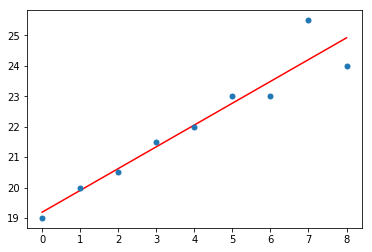

In [48]:
# 그래프
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(x,fitted, 'r-',x,y,'o', markersize=5)
plt.show()

## 문제 UCI Abalone

In [49]:
import pandas as pd
file_name="http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone = pd.read_csv(file_name, names=column_names)

In [50]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


rings가 종속변수(나머지 x)

In [51]:
# 무작위 선별
abalone.sample(n=10)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
3452,F,0.555,0.440,0.145,0.8815,0.4300,0.1975,0.2155,8
632,M,0.460,0.365,0.125,0.4670,0.1895,0.0945,0.1580,10
3086,I,0.355,0.270,0.075,0.2040,0.3045,0.0460,0.0595,7
1616,I,0.555,0.395,0.130,0.5585,0.2220,0.1245,0.1700,9
3984,M,0.600,0.465,0.155,1.2620,0.6245,0.2455,0.3300,10
2886,M,0.505,0.365,0.115,0.5210,0.2500,0.0960,0.1500,8
4014,M,0.625,0.480,0.175,1.0650,0.4865,0.2590,0.2850,10
2198,I,0.270,0.190,0.080,0.0810,0.0265,0.0195,0.0300,6
2897,I,0.545,0.430,0.150,0.7420,0.3525,0.1580,0.2080,10
1921,M,0.605,0.470,0.180,1.1155,0.4790,0.2565,0.3210,10


In [52]:
#기초통계
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [53]:
# 결측값은 평균 또는 모두 결측으로 처리 가능
abalone = abalone[abalone['height']>0]
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## 상관관계

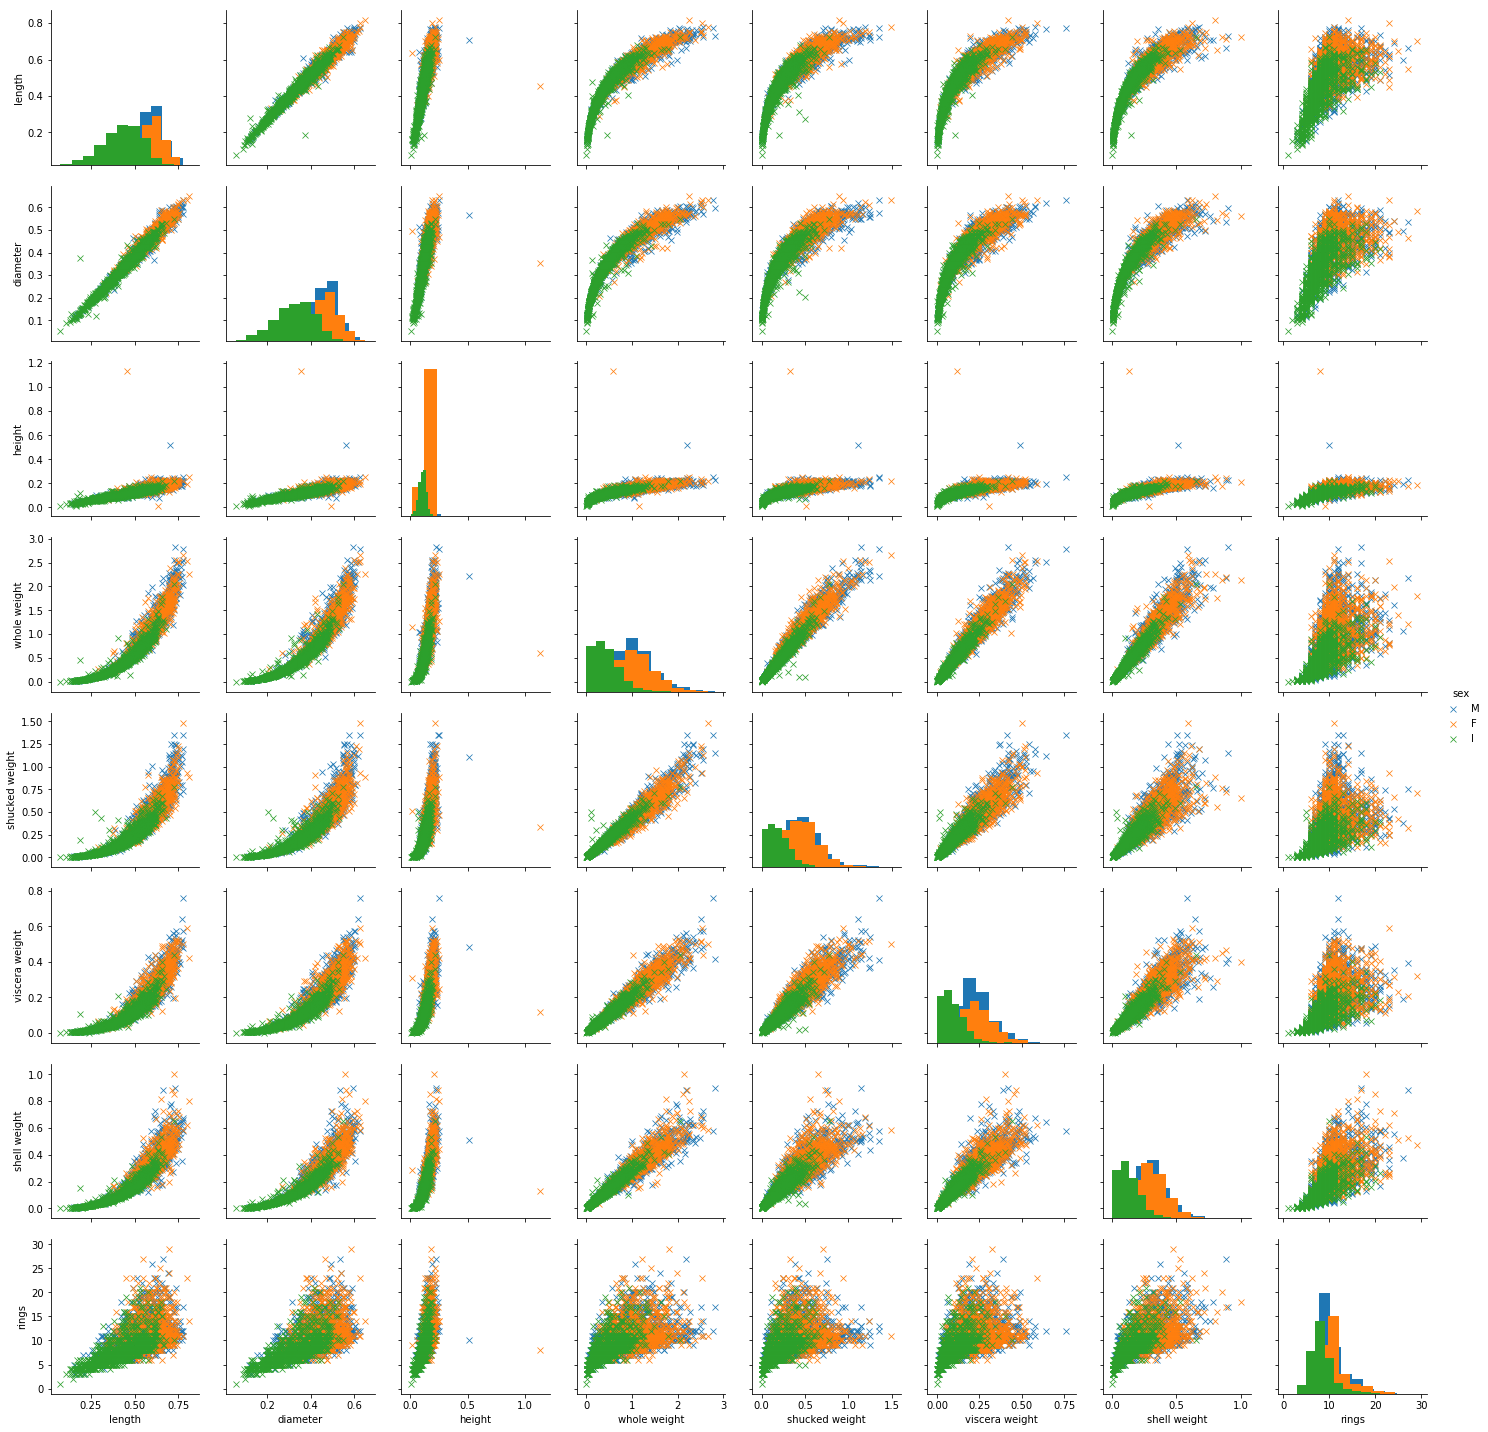

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(abalone, hue='sex', markers='x', diag_kind='hist')
plt.show()

In [60]:
%matplotlib inline
sns.corrplot(abalone)
plt.show()

AttributeError: 'module' object has no attribute 'corrplot'

## 독립변수, 종속변수 준비

In [62]:
#Transform sex into a dummy variable
abalone['Male'] = (abalone['sex']=='M').astype(int)
abalone['Female'] = (abalone['sex']=='F').astype(int)
abalone['Infant'] = (abalone['sex']=='I').astype(int)

## 회귀분석

In [63]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(abalone,train_size=0.5)

In [64]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error

xtrain = train.drop(['rings','sex'],axis=1)
ytrain = train['rings']
xtest = test.drop(['rings','sex'],axis=1)
ytest = test['rings']

In [65]:
print xtrain.head()

      length  diameter  height  whole weight  shucked weight  viscera weight  \
1196   0.710     0.560   0.180        1.6520          0.7350          0.3810   
1688   0.625     0.490   0.165        1.1165          0.4895          0.2615   
2881   0.495     0.375   0.120        0.6140          0.2855          0.1365   
2913   0.590     0.500   0.150        1.1420          0.4850          0.2650   
333    0.235     0.175   0.040        0.0705          0.0335          0.0150   

      shell weight  Male  Female  Infant  
1196        0.4525     0       1       0  
1688        0.3325     1       0       0  
2881        0.1610     0       0       1  
2913        0.3450     1       0       0  
333         0.0200     0       0       1  


In [66]:
regression = linear_model.LinearRegression()
regression.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
# 절편
print regression.intercept_

3.872570198703081


In [68]:
print train.columns,regression.coef_

Index([u'sex', u'length', u'diameter', u'height', u'whole weight',
       u'shucked weight', u'viscera weight', u'shell weight', u'rings',
       u'Male', u'Female', u'Infant'],
      dtype='object') [ 0.83  9.72  6.59  7.39 -18.33 -8.74  11.63  0.29  0.31 -0.60]


In [69]:
# 걸럼명과 계수 붙여 보관
zip(train.columns,regression.coef_)

[('sex', 0.8319947973077739),
 ('length', 9.719779847752719),
 ('diameter', 6.592155648292622),
 ('height', 7.392627419964406),
 ('whole weight', -18.33363151649564),
 ('shucked weight', -8.736651325361207),
 ('viscera weight', 11.630706471556332),
 ('shell weight', 0.2887745445597291),
 ('rings', 0.30904864709844354),
 ('Male', -0.5978231916582055)]

## 정확성

In [70]:
# Explained variance score: 1 is perfect prediction
accuracy = regression.score(xtest,ytest)
print(accuracy*100,'%')

(54.51300531932057, '%')


In [71]:
import numpy as np
print("Mean squared error: %.2f" % np.mean((regression.predict(xtest) - ytest) ** 2))

Mean squared error: 4.92


In [72]:
# 예측값과 실제값 비교
ypred = regression.predict(xtest)

In [73]:
r2 = r2_score(ytest, ypred )
mae = mean_absolute_error(ytest, ypred)

print r2,mae

0.5451300531932057 1.6091506560058355


In [74]:
#_df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})
y_actual_pred = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})
y_actual_pred.head()

,Actual,Predicted
605,13,9.110739
2059,8,7.725124
2266,14,11.176662
1229,6,6.971834
2669,8,10.465839


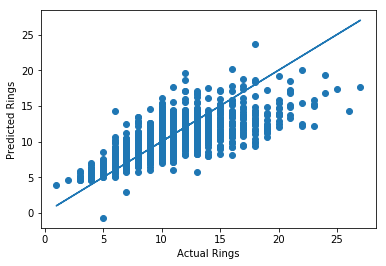

In [75]:
# 그래프
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(ytest,ypred)
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')
ax.plot(ytest,ytest)

## 비선형 모델
nth order polynomial 표현

In [76]:
# 괄호 안 숫자는 다항식의 계수들
import numpy as np
f=np.poly1d( [ 0.2, 0, 3, -7, 5 ] )
print f

     4     2
0.2 x + 3 x - 7 x + 5


## 선형 polyfit

In [77]:
# slope= 기울기, offset= 절편
import numpy as np

npoints = 20
slope = 2
offset = 3
x = np.arange(npoints)
y = slope * x + offset + np.random.normal(size=npoints)

In [78]:
print x
print y

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 3.31  5.63  6.65  9.32  10.26  12.84  16.36  14.64  19.69  22.66  24.94
  25.44  29.11  29.19  31.87  34.30  34.39  36.99  40.35  42.34]


In [85]:
# 1차식으로 풀자 = polyfit(*,*,1) <- 3번째 파라미터가 1
p = np.polyfit(x,y,1)
print p

[ 0.10  25.00]


In [81]:
# 예측 값을 출력할 때 사용
f=np.poly1d(p)
print f

 
2.053 x + 3.013


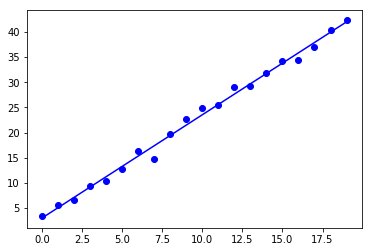

In [82]:
import matplotlib.pyplot as plt
f = np.poly1d(p)                # So we can call f(x)
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.plot(x, y, 'bo', label="Data")
plt.plot(x,f(x), 'b-',label="Polyfit")
plt.show()

## 비선형 polyfit

In [83]:
# 1) numpy.poly1d one-dimensional polynomial class
import numpy as np

x=np.linspace(1,7,50)
y=np.sin(x)
x = np.array([10, 20, 30, 40, 50])
y = np.array([20, 40, 30, 10, 40])

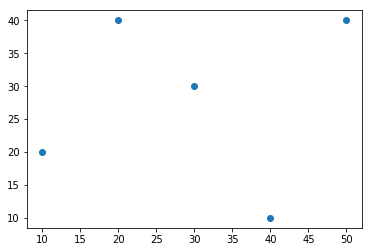

In [84]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(x,y)

In [86]:
 np.linspace(1,10,10)
#np.arange(1,10)

array([ 1.00,  2.00,  3.00,  4.00,  5.00,  6.00,  7.00,  8.00,  9.00,
        10.00])

In [87]:
coefficients=np.polyfit(x,y,3)
polynomial=np.poly1d(coefficients)
print "coefficients=",coefficients
print "polynomial=",polynomial

coefficients= [ 0.01 -0.59  15.40 -82.00]
polynomial=           3          2
0.006667 x - 0.5929 x + 15.4 x - 82


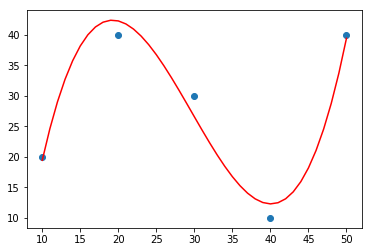

In [88]:
plt.scatter(x,y)
x50=np.arange(10,51)
plt.plot(x50,polynomial(x50),'r-')
plt.show()